<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

# <span style="color:red ">導入工具

In [ ]:
import nltk

# <span style="color:red "><將文字轉成可以計算的數據-方法一>-Using One Hot Encoding
----
   如果你還記得Dummy Variable，那你就已經知道怎麼做
    

In [1]:
# Importing the library
import pandas as pd

Text = "I am learning NLP"
# Generating the features
pd.get_dummies(Text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


# <span style="color:red "><將文字轉成可以計算的數據-方法二>-Using Count Vectorizing
----
    One Hot Encoding有缺點，只知道有沒有，不知道到底頻率多高，到底出現了幾次??  
###     CountVectorizer出場

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# 目標文字
text = ["I love NLP and I will learn NLP in 2month "]

# 創建機器人
vectorizer = CountVectorizer()

# 開始斷字訓練
vectorizer.fit(text)

# 把目標文字重新歸類一次
vector = vectorizer.transform(text)

# 輸出結果
# 斷字的編號順序
print(vectorizer.vocabulary_)
# 每個編號順序的出現頻率
print(vector.toarray())


{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


### CountVectorizer()會先把你的Text都標記一次
### 再數數一次

#  <span style="color:red"> 上面的這個方法，我們也稱為bag-of-words (BoW)
----
    我們把一段文字，改用裡面的字和出現次數來重新詮釋，那就稱為bag-of-words (BoW)
    譬如:Dogs like cats, but cats do not like dogs
    它的Bow如下:
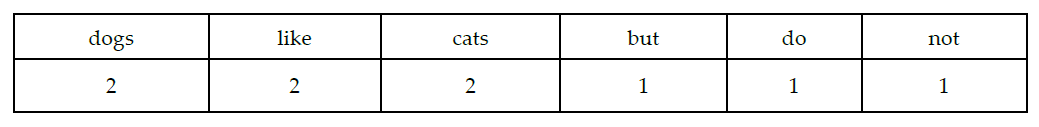
----
    經過BoW處理，
    每一個文字變成變數，
    然後變數的值變成這個文字出現的次數。
----
    好處是簡單、有效。
    缺點是它沒有辦法保留字的順序和文法
    還有一點就是，它是以字為單位去做count
    

# <span style="color:red ">將文字轉成可以計算的數據-N-grams
----
    因為BoW是以字為單位去做count，
    那如果你碰到文字是“not bad.”，一數，
    客人是說'不錯'，結果你數成'not':1,'bad':1
    這樣對嗎?
----
    N-grams出場
    他用不同的字段來切文章
    舉例來說:
    “I am learning NLP”
    單字為單位:
    Unigrams: “I”, “am”, “ learning”, “NLP”
    雙字為單位:
    Bigrams: “I am”, “am learning”, “learning NLP”
    三字為單位:
    Trigrams: “I am learning”, “am learning NLP”

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]

# create the transform
# ngram_range決定你要多少字當一段， (min_n, max_n)
vectorizer = CountVectorizer(ngram_range=(2,2))

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


In [ ]:
#nltk也有提供相關的方法
from nltk import ngrams
list(ngrams('The cute little boy is playing with the kitten.'.split(), 2))

# <span style="color:red ">將文字轉成可以計算的數據-TF-IDF
----
    還是有缺點，
    如果我們有好幾篇文章，
    依照次數的分析，可能都一樣。
    那我們會以為它們是差不多的狀況，
    但是如果文章篇長不一樣(一篇20個字，一篇2000個字)，
    那financial都出現三次，那我們就說這兩篇文章差不多，
    這樣對嗎?
----
##    TF-IDF出場


    Term frequency (TF)
        -表示詞頻，即一個詞在在一篇文章中出現的次數，但在實際應用時會有一個漏洞，就是篇幅長的文章給定詞出現的次數會更多一點。
         因此我們需要對次數 進行歸一化，通常用給定詞的次數除以文章的總詞數。
------
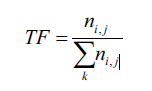

     IDF（Inverse Document Frequency）
        -逆文本頻率指數，如果包含關鍵詞w的文檔越少，則說明關鍵詞w具有很好的類別區分能力。某一關鍵詞的IDF，
         可以用總的文章數量除以包含該關鍵詞的文章的數量，然後對結果取對數得到

------
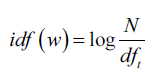

    TF-IDF
------
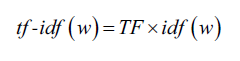

In [4]:
Text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

In [5]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(Text)
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
print('-'*50)
target=vectorizer.idf_.tolist()
#print(target('dog'))
for key, value in vectorizer.vocabulary_.items():
    print(key,':',round(target[value],3))

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
--------------------------------------------------
the : 1.0
quick : 1.693
brown : 1.693
fox : 1.288
jumped : 1.693
over : 1.693
lazy : 1.693
dog : 1.288


### 注意the，三篇文章都有，所以完全沒有辨識度，所以只給1分。
### 你會發現，第一篇文章才有的字，都會給高分，因為看到它就知道這是第一篇文章

#  <span style="color:red"> Sentimental Analysis-情緒分析
----
    在Social Media的時代，
    很多人會在社交平台上面發表Opinion(意見),
    所以就產生了opinion mining(意見挖礦)。
    這個過程就是希望透過對裡面文字的分析，可以判斷出這段文字的傾向。
    基本上會分成三種:positive, neutral,or negative.

# <span style="color:red ">第一個工具-textblob

### <span style="color:red ">安裝工具

In [ ]:
! pip install textblob

# <span style="color:red ">textblob會返回兩個數
    * Polarity
      -範圍是[-1,1]，1代表很正面的言論，-1代表很負面的言論。
    * Subjectivity
      -範圍是[0,1]，0是非常客觀的，而1是非常主觀的。

In [6]:
#底下是兩段客人的留言
review = "I like this phone. screen quality and camera clarity is really good."
review2 = "This tv is not good. Bad quality, no clarity, worst experience"

In [7]:
#導入模組
from textblob import TextBlob

#TextBlob 有自己訓練好的模組，可以完成這個工作
blob = TextBlob(review)
blob.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [8]:
blob = TextBlob(review2)
blob.sentiment

Sentiment(polarity=-0.6833333333333332, subjectivity=0.7555555555555555)

# <span style="color:red ">第二個工具-vaderSentiment

### <span style="color:red ">安裝工具

In [ ]:
pip install vaderSentiment

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "I'm really happy with my purchase"
vs = analyzer.polarity_scores(sentence)
print(vs)

#複合表示總體得分，neu表示中性，neg表示負面情緒，pos表示正面情緒

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6115}


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize

analyzer = SentimentIntensityAnalyzer()
paragraph = """
            I'm really happy with my purchase.
            I've been using the product for two weeks now.
            It does exactly as described in the product description.
            The only problem is that it takes a long time to charge.
            However, since I recharge during nights, this is something I can
            live with.
            """
sentence_list = tokenize.sent_tokenize(paragraph)
cumulative_sentiment = 0.0
for sentence in sentence_list:
    vs = analyzer.polarity_scores(sentence)
    #把compound成績加總起來
    cumulative_sentiment += vs["compound"]
    print(sentence, ' : ', vs["compound"])
#最後算個平均
average_score = cumulative_sentiment / len(sentence_list)
print('Average score:', average_score)


            I'm really happy with my purchase.  :  0.6115
I've been using the product for two weeks now.  :  0.0
It does exactly as described in the product description.  :  0.0
The only problem is that it takes a long time to charge.  :  -0.4019
However, since I recharge during nights, this is something I can
            live with.  :  0.0
Average score: 0.04192000000000001


# <span style="color:red "> <測驗題>

---
資料夾裡面有一個Amazon的顧客反饋資料庫，請先幫忙導進來，當一個pandas檔案

### <span style="color:red "> <答案>

In [ ]:
import sqlite3
import pandas as pd
db = sqlite3.connect('reviews.db')
results = db.execute("SELECT * from reviews")
results = results.fetchall()        # 結果轉成元素是元組的串列
reviews=pd.DataFrame(results,columns=['id','review_id','rating','title','review'])
reviews

# <span style="color:red "> <測驗題>

---
每一篇反饋的Title和review都充滿了客人滿滿的情緒，請利用這兩個欄位，做一下情感分析

### <span style="color:red "> <答案>

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize
import sqlite3
import pandas as pd


db = sqlite3.connect('reviews.db')
results = db.execute("SELECT * from reviews")
results = results.fetchall()        # 結果轉成元素是元組的串列
reviews=pd.DataFrame(results,columns=['id','review_id','rating','title','review'])
analyzer = SentimentIntensityAnalyzer()

def process(full_review):
    sentence_list = tokenize.sent_tokenize(full_review)
    cumulative_sentiment = 0.0
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        cumulative_sentiment += vs["compound"]
    average_score = cumulative_sentiment / len(sentence_list)
    return average_score
    
reviews['full_review']=reviews['title'] + '. ' +reviews['review']
reviews['average_score']=reviews['full_review'].apply(process)
reviews